# Exploration of the quality of the autoencoder

In [1]:
import warnings
warnings.filterwarnings("ignore") # i hate warnings

from cheff import CheffLDM, CheffAEModel
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image, to_grayscale, to_tensor
from torchvision.utils import make_grid

In [2]:
device = 'cpu'
sdm_path = '../assets/models/cheff_diff_uncond.pt'
ae_path = '../assets/models/cheff_autoencoder.pt'

cheff_ldm = CheffLDM(model_path=sdm_path, ae_path=ae_path, device=device)

### Is the autoencoder actually good?

In [4]:
# generate some samples
imgs = cheff_ldm.sample(
    batch_size=3, # Number of images to synthesize
    sampling_steps=100, # Number of DDIM sampling steps
    eta=1.0, # eta in DDIM sampling
    decode=True # Use the AE decoder to translate from latent space
)

# The image are still in [-1, 1] so they need to be rescaled.
imgs.clamp_(-1, 1)
imgs = (imgs + 1) / 2

# save
imgs_save = imgs.permute(0, 2, 3, 1).cpu().numpy()
for i in range(imgs_save.shape[0]):
    plt.imsave(f'../assets/cxrs/{i}.png', imgs_save[i])

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [05:12<00:00,  3.12s/it]


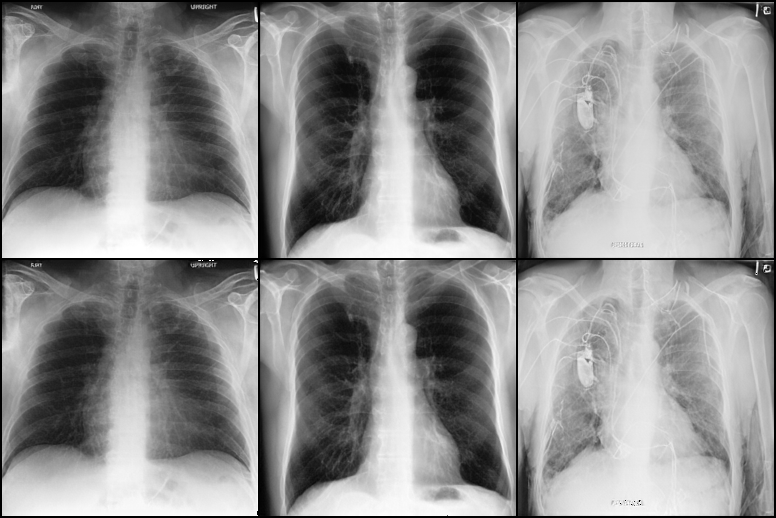

In [4]:
cheff_ae = CheffAEModel(model_path=ae_path, device=device)

# Encode images to latent space
z = cheff_ae.encode(imgs)

# Reconstruct images
imgs_rec = cheff_ae.decode(z)

# Check reconstruction quality
imgs_grid = torch.cat([imgs, imgs_rec]).cpu()
imgs_grid = torch.stack([to_tensor(to_grayscale(to_pil_image(i))) for i in imgs_grid])
grid = make_grid(imgs_grid, nrow=len(imgs))
to_pil_image(grid)

Spectacular!

### Exploring different values of eta 

Data shape for DDIM sampling is (3, 3, 64, 64), eta 0
Running DDIM Sampling with 100 timesteps


DDIM Sampler:   0%|          | 0/100 [00:00<?, ?it/s]

DDIM Sampler: 100%|██████████| 100/100 [00:23<00:00,  4.20it/s]


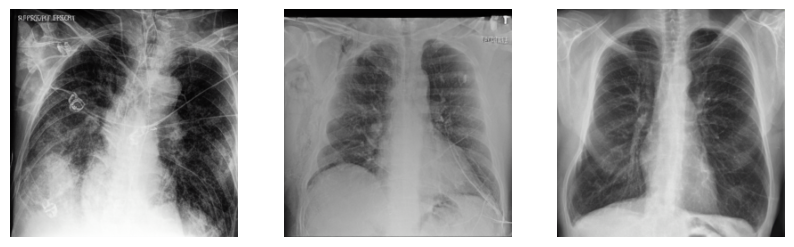

Data shape for DDIM sampling is (3, 3, 64, 64), eta 0.1
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [00:24<00:00,  4.16it/s]


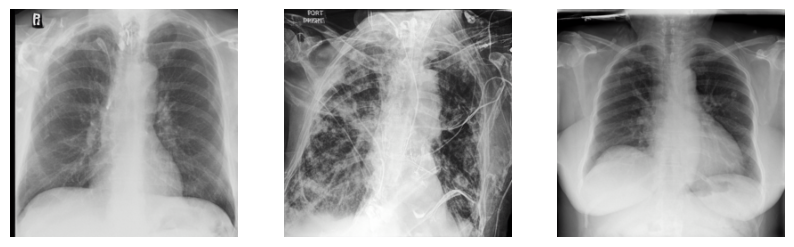

Data shape for DDIM sampling is (3, 3, 64, 64), eta 0.5
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


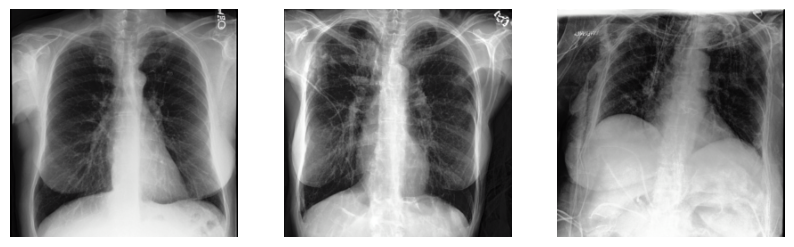

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


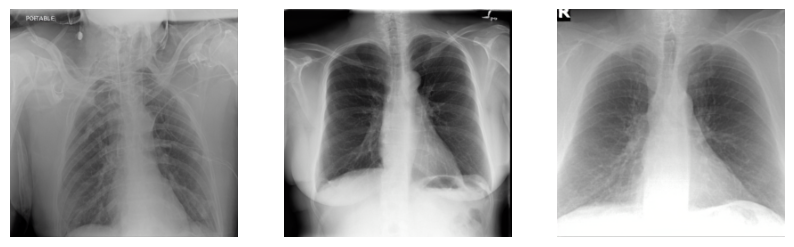

In [18]:
etas = [0, 0.1, 0.5, 1.0]

for eta in etas:
    imgs = cheff_ldm.sample(
        batch_size=3, # Number of images to synthesize
        sampling_steps=100, # Number of DDIM sampling steps
        eta=eta, # eta in DDIM sampling
        decode=True # Use the AE decoder to translate from latent space
    )

    # The image are still in [-1, 1] so they need to be rescaled.
    imgs.clamp_(-1, 1)
    imgs = (imgs + 1) / 2

    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(imgs[i].permute(1, 2, 0).cpu().numpy())
        plt.axis('off')
    plt.show()

I truly have no idea what eta changes here.

### Exploring different numbers of sampling steps

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 10 timesteps


DDIM Sampler:   0%|          | 0/10 [00:00<?, ?it/s]

DDIM Sampler: 100%|██████████| 10/10 [00:02<00:00,  4.52it/s]


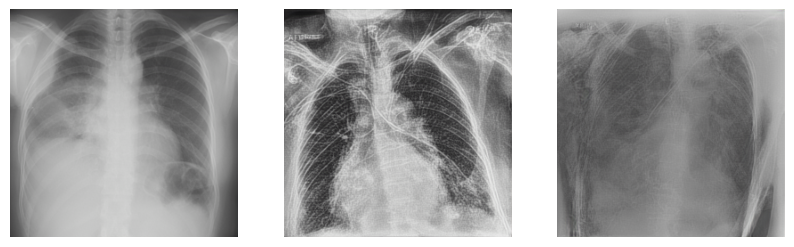

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 25 timesteps


DDIM Sampler: 100%|██████████| 25/25 [00:05<00:00,  4.31it/s]


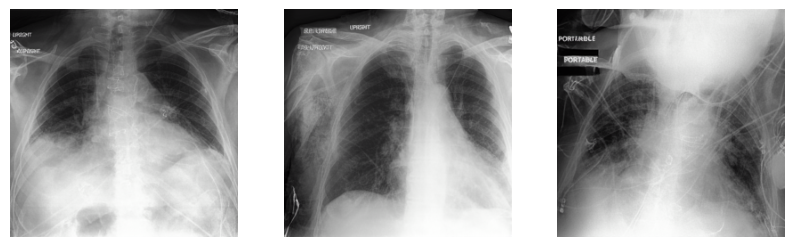

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 50 timesteps


DDIM Sampler: 100%|██████████| 50/50 [00:11<00:00,  4.21it/s]


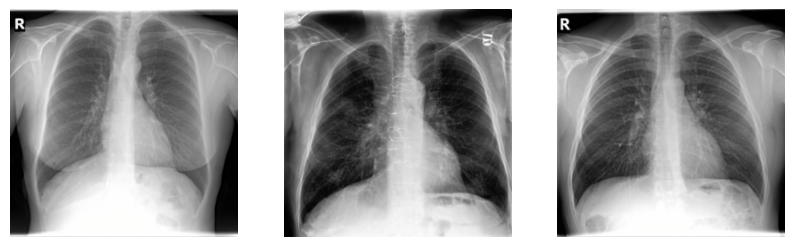

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 77 timesteps


DDIM Sampler: 100%|██████████| 77/77 [00:18<00:00,  4.16it/s]


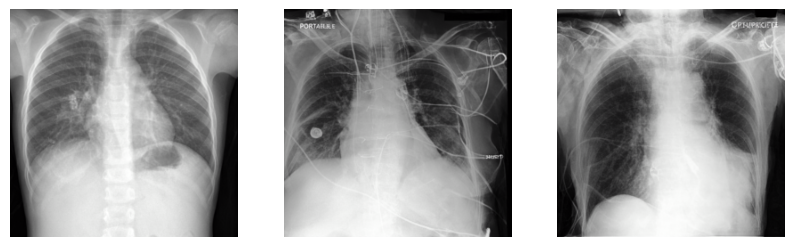

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


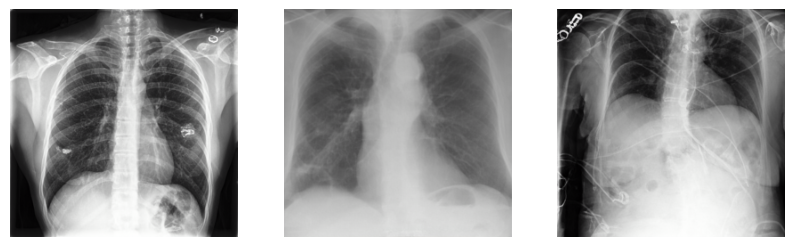

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 125 timesteps


DDIM Sampler: 100%|██████████| 125/125 [01:01<00:00,  2.03it/s]


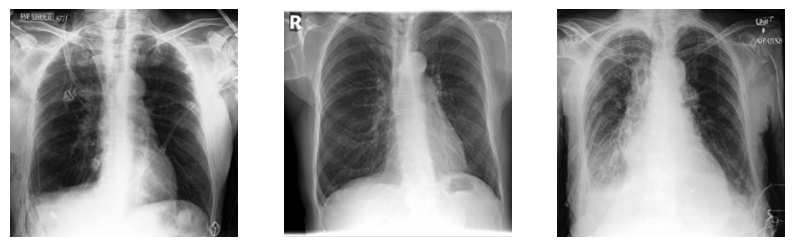

Data shape for DDIM sampling is (3, 3, 64, 64), eta 1.0
Running DDIM Sampling with 167 timesteps


DDIM Sampler: 100%|██████████| 167/167 [02:33<00:00,  1.09it/s]


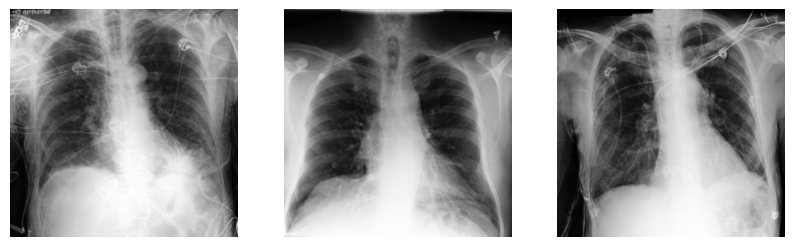

In [22]:
sampling_list = [10, 25, 50, 75, 100, 125, 150]

for sampling_steps in sampling_list:
    imgs = cheff_ldm.sample(
        batch_size=3, # Number of images to synthesize
        sampling_steps=sampling_steps, # Number of DDIM sampling steps
        eta=1.0, # eta in DDIM sampling
        decode=True # Use the AE decoder to translate from latent space
    )

    # The image are still in [-1, 1] so they need to be rescaled.
    imgs.clamp_(-1, 1)
    imgs = (imgs + 1) / 2

    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(imgs[i].permute(1, 2, 0).cpu().numpy())
        plt.axis('off')
    plt.show()

100 is perfectly fine